### Ejemplo: problema de clasificación


Crearemos un dataset sintético con dos posibles categorías. 

El objetivo es introducir un esquema de clasificación para luego aplicarlo en los siguientes ejercicios.

In [ ]:
from sklearn.datasets import make_blobs   # Para generar un espacio de clasificacion.
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Creamos un dataset de ejemplo
X, y = make_blobs(n_samples = 1200,         # Cantidad de puntos (tamaño del dataset).
                  centers = [(1,1),(8,8)],  # Centroide de cada 'cluster'.
                  n_features = 2,           # Dimensión del espacio (cantidad de atributos).
                  cluster_std = 1)          # dispersión de cada cluster.

*Pueden probar, cambiando los valores de sus argumentos para generar distitos datasets y ver el comportamiento.*

Generamos su gráfico

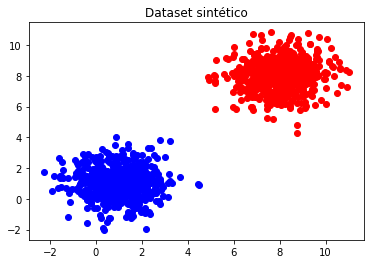

In [ ]:
def plot_blobs(X, y):
    # Tomo los indices correspondientes a cada clase (0 o 1).
    cluster1_idxs = np.where(y==1)[0]
    cluster0_idxs = np.where(y==0)[0]
    plt.scatter(X[cluster0_idxs, 0], X[cluster0_idxs, 1], color='blue')
    plt.scatter(X[cluster1_idxs, 0], X[cluster1_idxs, 1], color='red')

    plt.title('Dataset sintético')

    plt.show()

plot_blobs(X,y)

In [ ]:
# Como antes, dividimos el dataset para entrenar y evaluar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

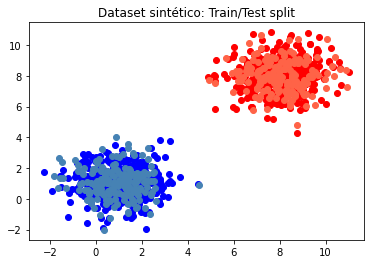

In [ ]:
# Plot train data
cluster1_idxs = np.where(y_train==1)[0]
cluster0_idxs = np.where(y_train==0)[0]
plt.scatter(X_train[cluster0_idxs, 0], X_train[cluster0_idxs, 1], color='blue')
plt.scatter(X_train[cluster1_idxs, 0], X_train[cluster1_idxs, 1], color='red')

# Plot test data
cluster1_idxs = np.where(y_test==1)[0]
cluster0_idxs = np.where(y_test==0)[0]
plt.scatter(X_test[cluster0_idxs, 0], X_test[cluster0_idxs, 1], color='steelblue')
plt.scatter(X_test[cluster1_idxs, 0], X_test[cluster1_idxs, 1], color='tomato')


plt.title('Dataset sintético: Train/Test split')

plt.show()

In [ ]:
# Usamos un clasificador lineal que genere una separación por margen máximo
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm
model = svm.SVC(kernel='linear')    # especificamos el tipo de modelo (lineal)
model = model.fit(X_train, y_train)      # ajustamos el modelo


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
equals = (y_test == y_pred)
n_correct = equals.sum()
print('Prediciones correctas: {}%'.format(100 * n_correct / len(y_test)))

Prediciones correctas: 100.0%


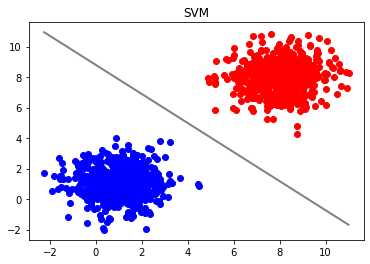

In [ ]:
w = model.coef_[0]
b = model.intercept_[0]

# Sobre la linea de decisión (x0, x1) cumple w0*x0 + w1*x1 + b = 0
# luego, x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(min(X_train[:,0]), max(X_train[:,0]))
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
plt.plot(x0, decision_boundary, color='gray', linewidth=2, label="SVM")


cluster1_idxs = np.where(y==1)[0]
cluster0_idxs = np.where(y==0)[0]
plt.scatter(X[cluster0_idxs, 0], X[cluster0_idxs, 1], color='blue')
plt.scatter(X[cluster1_idxs, 0], X[cluster1_idxs, 1], color='red')

plt.title('SVM')

plt.show()



### Diferentes parámetros

Si bien en este ejemplo los datos son trivialmente separables, podemos probar con distintos modelos para elegir el que mejor se ajusta a los datos de nuestro problema.

Por ejemplo, para nuestro modelo SVM lineal, podemos probar con distintos valores para el parámetro ```C```.
Incluso con distintos modelos SVM (además del lineal).

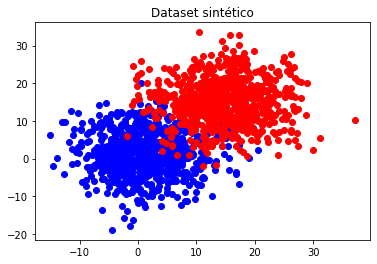

In [ ]:
X, y = make_blobs(n_samples = 1500,
                  centers = [(1,1),(15,15)],
                  n_features = 2,
                  cluster_std = 6)
plot_blobs(X, y)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=124)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.3, random_state=124)

In [ ]:
# Iteramos sobre distintos valores posibles para este parámetro.
for c in [1e-4, 1e-3, 1e-2, 1e-1, 100]:
    model = svm.SVC(kernel='linear', C=c)
    model = model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    equals = (y_val == y_pred)
    n_correct = equals.sum()
    print('C: {}, accuracy: {}%'.format(c, 100 * n_correct / len(y_val)))


C: 0.0001, accuracy: 94.28571428571429%
C: 0.001, accuracy: 94.92063492063492%
C: 0.01, accuracy: 95.23809523809524%
C: 0.1, accuracy: 94.60317460317461%
C: 100, accuracy: 94.28571428571429%


In [ ]:
# Tomamos el mejor modelo y entrenamos con todos los datos de entrenamiento (train+val)
c = 1e-2
model = svm.SVC(kernel='linear', C=c)
model = model.fit(X_trainval, y_trainval)

y_pred = model.predict(X_test)

equals = (y_test == y_pred)
n_correct = equals.sum()
print('C: {}, accuracy: {}%'.format(c, 100 * n_correct / len(y_test)))

C: 0.01, accuracy: 94.66666666666667%


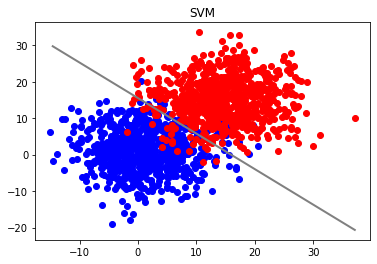

In [ ]:
w = model.coef_[0]
b = model.intercept_[0]

# Sobre la linea de decisión (x0, x1) cumple w0*x0 + w1*x1 + b = 0
# luego, x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(min(X_train[:,0]), max(X_train[:,0]))
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
plt.plot(x0, decision_boundary, color='gray', linewidth=2, label="SVM")


cluster1_idxs = np.where(y==1)[0]
cluster0_idxs = np.where(y==0)[0]
plt.scatter(X[cluster0_idxs, 0], X[cluster0_idxs, 1], color='blue')
plt.scatter(X[cluster1_idxs, 0], X[cluster1_idxs, 1], color='red')

plt.title('SVM')

plt.show()

En el ejemplo anterior probamos un modelo lineal, porque generamos un dataset con ese objetivo.
En términos más generales, podemos validar contra distintos modelos y escoger el que resulte más propicio para nuestro problema

In [ ]:
# A modo de ejemplo tomamos algunos parámetros con valores específicos.
C=1.
gamma=0.1
degree=3

# Instanciamos tres modelos diferentes (cada uno tiene sus parámetros).
# Notar que estamos entrenando al llamar al método fit.
svm_linear = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
svm_rbf = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X_train, y_train)
svm_poly = svm.SVC(kernel='poly', degree=degree, C=C).fit(X_train, y_train)

# Comparamos los resultados usando nuestro conjunto de validación.
for name, model in [('linear', svm_linear), ('RBF',svm_rbf), ('poly', svm_poly)]:
    y_pred = model.predict(X_val)

    equals = (y_val == y_pred)
    n_correct = equals.sum()
    print('Model: {}, accuracy: {}%'.format(name, 100 * n_correct / len(y_val)))

Model: linear, accuracy: 94.28571428571429%
Model: RBF, accuracy: 94.92063492063492%
Model: poly, accuracy: 93.96825396825396%


In [ ]:
svm_linear = svm.SVC(kernel='rbf', C=C).fit(X_trainval, y_trainval)
y_pred = model.predict(X_test)
equals = (y_test == y_pred)
n_correct = equals.sum()
print('accuracy: {:.2f}%'.format(100 * n_correct / len(y_test)))

accuracy: 94.89%


Notar que hemos validado tres modelos diferentes (lineal, radial y polinómico). Aunque lo hicimos con valores específicos para sus parámetros.
Podemos generar una validación mucho más completa, buscando sobre distintos posibles valores para los hiperparámetros de cada modelo.

Todo esto se puede hacer utilizando funcionalidades provistas por sklearn y no es necesario hacerlo de manera explícita como en estos ejemplos.